<a href="https://colab.research.google.com/github/Thiagorcj/Projeto2-IC/blob/main/Analise_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto análise das provas de Introdução ao computador:

Provas são a forma e meio de avaliar o entendimento dos alunos para os diversos conteúdos mostradas e por esse motivo são um forte indicativo de dificuldades e problemas encontrados no entendimento da disciplina. A partir dessa premissa, desenvolve-se esse projeto, o qual desenvolve uma análise exploratória de dados coletados de provas da disciplina de Introdução ao computador.

Há duas provas que serão analisadas referentes ao semestre do período de 2022.2. Para análise e divisão dos dados foram divididos e organizados de forma que fosse possível identificar erros e acertos em conteúdos específicos.

### Importando bibliotecas:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Prova 1 (2022.2):

### Abrindo o arquivo com informação de acertos e notas:

A seguir está um dataframe contendo as informações de acertos e erros das questões da primeira prova. Para questão foi definido 1 para acertos e 0 para erros, sendo essa uma aproximação, nem sempre foi um erro ou acerto completo da questão.

In [ ]:
df = pd.read_csv('https://github.com/Thiagorcj/Projeto2-IC/raw/main/Prova_1.csv')
df.head()

,Quest_1,Quest_2a,Quest_2b,Quest_2c,Quest_2d,Quest_3a,Quest_3b,Quest_4,Quest_5,Nota
0,1,1,0,1,0,1,0,1,0,7.50
1,0,1,1,0,0,1,1,0,0,4.00
2,1,1,1,1,1,1,1,0,0,8.00
3,1,1,1,1,1,1,1,0,1,10.00
4,0,0,1,0,0,1,0,0,0,3.75


###Descrição dos dados das colunas:
- Quest_1 : refere-se a uma questão de número de dígitos para representação de elementos com os sistemas de numeração.
- Quest_2a: refere-se à questão de transformação de base 10 para base 2.
- Quest_2b: refere-se à questão de transformação de base 2 para base 8.
- Quest_2c: refere-se à questão de transformação de base 8 para base 16.
- Quest_2d: refere-se à questão de transformação de base 16 para base 10.
- Quest_3a: refere-se a cálculos aritméticos em binário.
- Quest_3b: refere-se a transformação base 2 para base 10.
- Quest_4: refere-se à escolha de base para representação e codificação de elementos.
- Quest_5: refere-se à questão de Tabela ASCII.

Obs: Os alunos podiam escolher entre fazer a questão 4 ou 5.


###Funções e dicionário:

In [ ]:
quest_dict = {
    'Quest_1': 'Questão de número de dígitos para representação de elementos com os sistemas de numeração',
    'Quest_2a': 'Questão de transformação de base 10 para base 2',
    'Quest_2b': 'Questão de transformação de base 2 para base 8',
    'Quest_2c': 'Questão de transformação de base 8 para base 16',
    'Quest_2d': 'Questão de transformação de base 16 para base 10',
    'Quest_3a': 'Questão de cálculos aritméticos em binário',
    'Quest_3b': 'Questão de transformação base 2 para base 10',
    'Quest_4': 'Questão de escolha de base para representação e codificação de elementos',
    'Quest_5': 'Questão de Tabela ASCII'
}

In [ ]:
#Função para mudar valores
def change_name(valor):
    if valor == 1:
        return "Acertos"
    else:
        return "Erros"
# Função para calcular em casos que os alunos podem escolher entre fazer uma ou outra questão
def casos_especiais(quest1,quest2):
  erros = (df[quest1]==0).sum() - (df[quest2]==1).sum()
  acertos = (df[quest2]==1).sum() + (df[quest1]==1).sum()
  return 100*acertos/(erros+acertos)
# Função para calcular a mais acertada entre duas questões
def mais_acertada(quest1,quest2):
  if (df[quest2]==1).sum()>(df[quest1]==1).sum():
    return quest_dict[quest2] + ' foi a mais acertada'
  elif (df[quest1]==1).sum()>(df[quest2]==1).sum():
    return quest_dict[quest1] + ' foi a mais acertada'
  else:
    return 'há mesmo número de escolhas'

# Mapeamento de cores para o gráfico de barras
colors_map = {'Acertos': '#1f77b4', 'Erros': '#ff7f0e'}

# Função para calcular a porcentagem de acertos e exibir os gráficos
def plot_acertos_erros(questao):
    status = ['Acertos', 'Erros']
    acertos = (df[questao] == 1).sum()
    erros = (df[questao] == 0).sum()
    porcentagem_acertos = 100 * acertos / (erros + acertos)
    porcentagem_erros = 100 * erros / (erros + acertos)
    numero = [porcentagem_acertos, porcentagem_erros]

    # Criando dois subplots, um para cada gráfico
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Gráfico de pizza (pie chart) na primeira posição do subplot
    p1 = ax1.pie(numero, labels=status, colors=[colors_map['Acertos'], colors_map['Erros']])
    ax1.set_title(f"{quest_dict[questao]}")

    # Gráfico de barras na segunda posição do subplot
    order = ['Acertos', 'Erros']  # Definindo a ordem das categorias no gráfico de barras
    p2 = sns.countplot(x=df[questao].apply(change_name), ax=ax2, palette=colors_map.values(), order=order)
    ax2.set_xlabel("Respostas", fontsize=9)
    ax2.set_ylabel("Quantidade", fontsize=9)

    # Ajustando o layout para evitar sobreposição de elementos
    plt.tight_layout()

    # Exibindo os gráficos
    plt.show()

###Média de nota da turma:

In [ ]:
print(f"Média da turma: {df['Nota'].mean()}")

Média da turma: 6.884375


### Cálculo da porcentagem de acerto por questão:

In [ ]:
print("Porcentagem de acertos por questão:")
contador = 0
for coluna in df.columns:
    if contador < 7:
        acertos = (df[coluna]==1).sum()
        erros = (df[coluna]==0).sum()
        porcentagem = 100*acertos/(erros+acertos)
        contador +=1
        print(f"{quest_dict[coluna]} -> {porcentagem : .2f}%")

Porcentagem de acertos por questão:
Questão de número de dígitos para representação de elementos com os sistemas de numeração ->  56.25%
Questão de transformação de base 10 para base 2 ->  93.75%
Questão de transformação de base 2 para base 8 ->  90.62%
Questão de transformação de base 8 para base 16 ->  75.00%
Questão de transformação de base 16 para base 10 ->  50.00%
Questão de cálculos aritméticos em binário ->  75.00%
Questão de transformação base 2 para base 10 ->  59.38%


### Casos especiais:
 Os alunos podiam escolher entre fazer a 5 ou a 4. Então o cálculo é diferente e nós só podemos obter informações como a probabilidade de erros/acertos de ambas questões ao mesmo tempo e qual questão foi mais acertada/escolhida pelos alunos: Obs-A função casos_especiais está definida no espaço de funções no início do notebook.

In [ ]:
print("Porcentagem de acertos:")
print(f"{quest_dict['Quest_4']} / {quest_dict['Quest_5']} -> {casos_especiais('Quest_4','Quest_5'): .2f}%")
print("Questão mais escolhida/acertada:")
print(f"Entre as duas questões: {quest_dict['Quest_4']} / {quest_dict['Quest_5']} -> {mais_acertada('Quest_4','Quest_5')}.")


Porcentagem de acertos:
Questão de escolha de base para representação e codificação de elementos / Questão de Tabela ASCII ->  62.50%
Questão mais escolhida/acertada:
Entre as duas questões: Questão de escolha de base para representação e codificação de elementos / Questão de Tabela ASCII -> Questão de escolha de base para representação e codificação de elementos foi a mais acertada.


### Desenvolvendo gráficos:

####Questão de número de dígitos para representação de elementos com os sistemas de numeração:

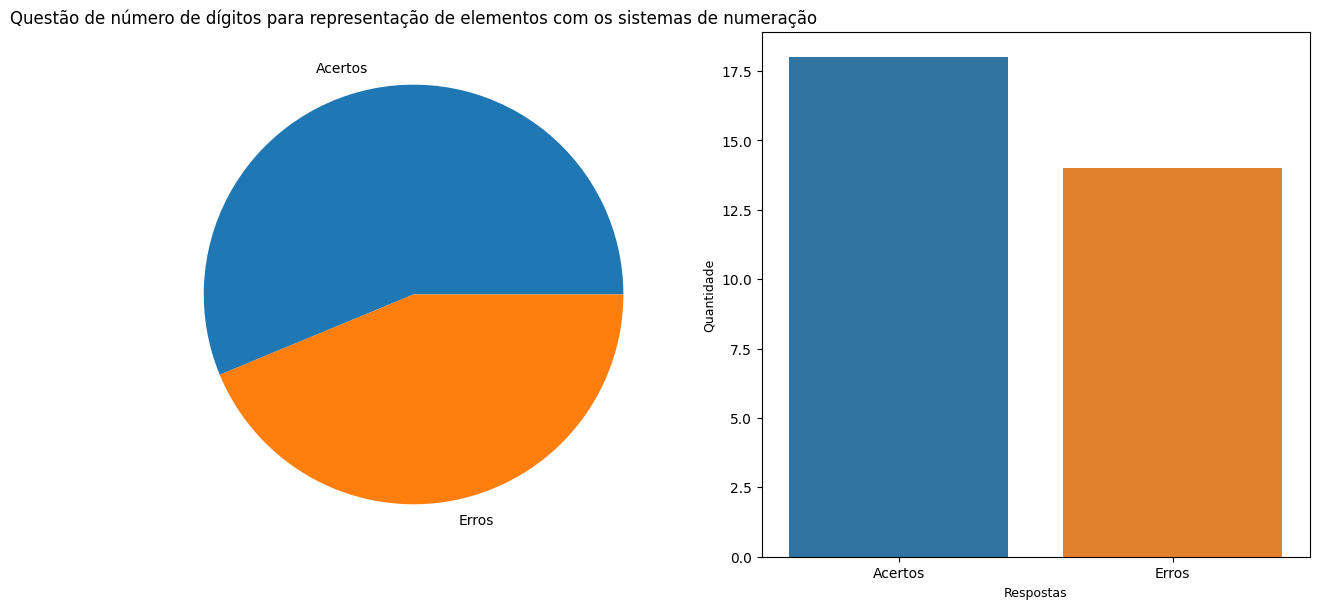

In [ ]:
plot_acertos_erros('Quest_1')

Essa questão tiveram uma porcentagem considerável de erros. É um conteúdo que talvez necessite de atenção.

####Questão de transformação de base 10 para base 2:

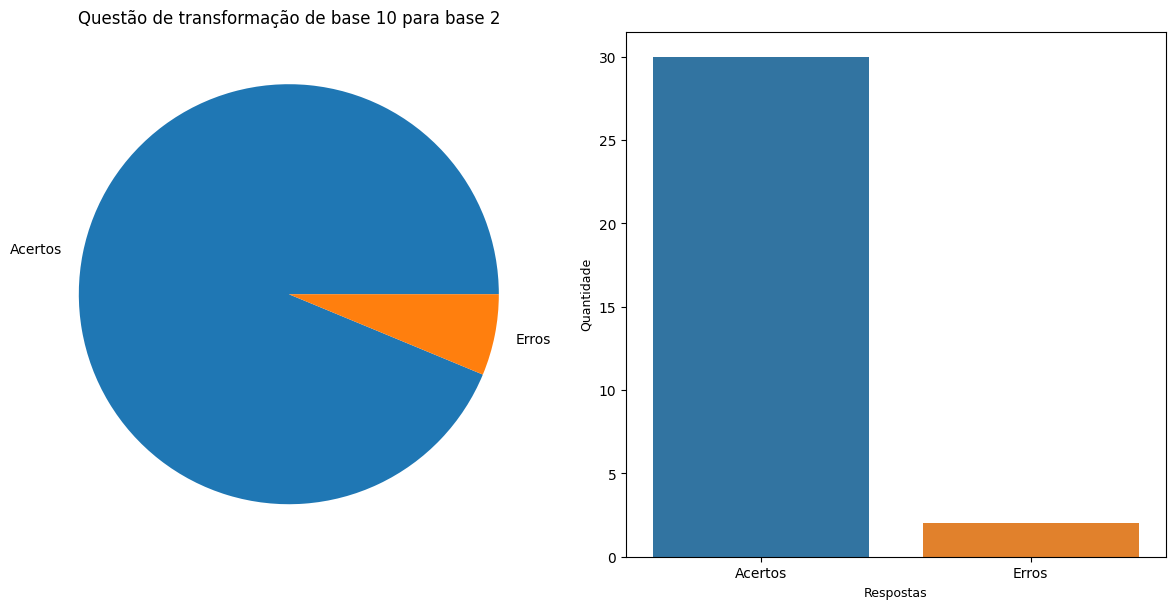

In [ ]:
plot_acertos_erros('Quest_2a')

Essa questão obteve um número baixo de erros. Acredita-se que a maioria da turma entendeu o conteúdo.

####Questão de transformação de base 2 para base 8:

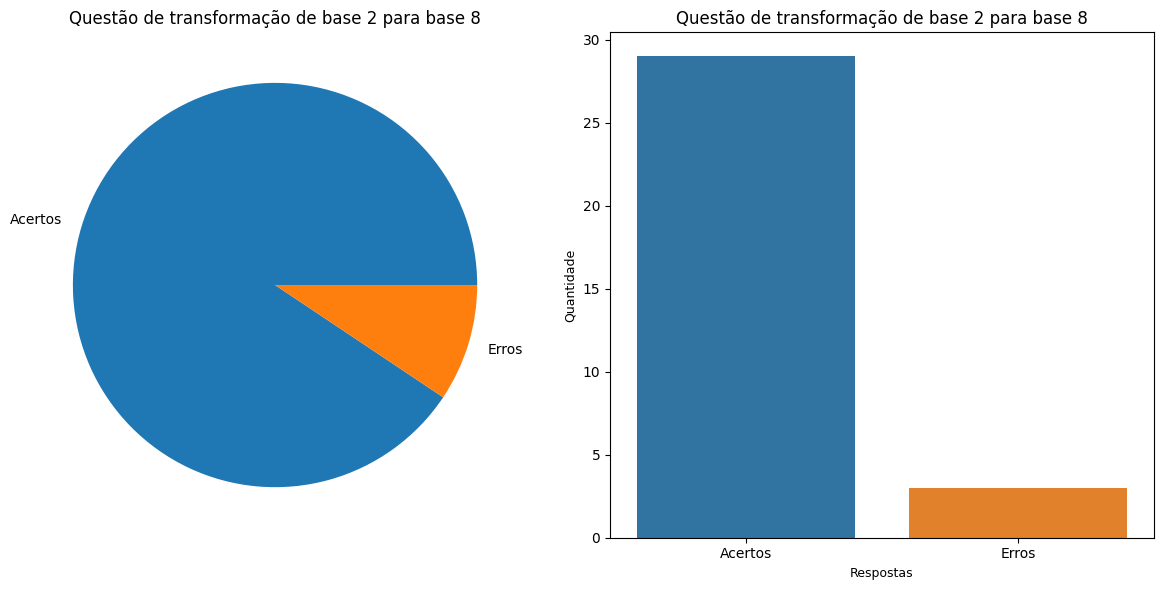

In [ ]:
plot_acertos_erros('Quest_2b')

Essa questão obteve uma porcentagem baixa de erros. Acredita-se que a maioria da turma entendeu o conteúdo.

####Questão de transformação de base 8 para base 16

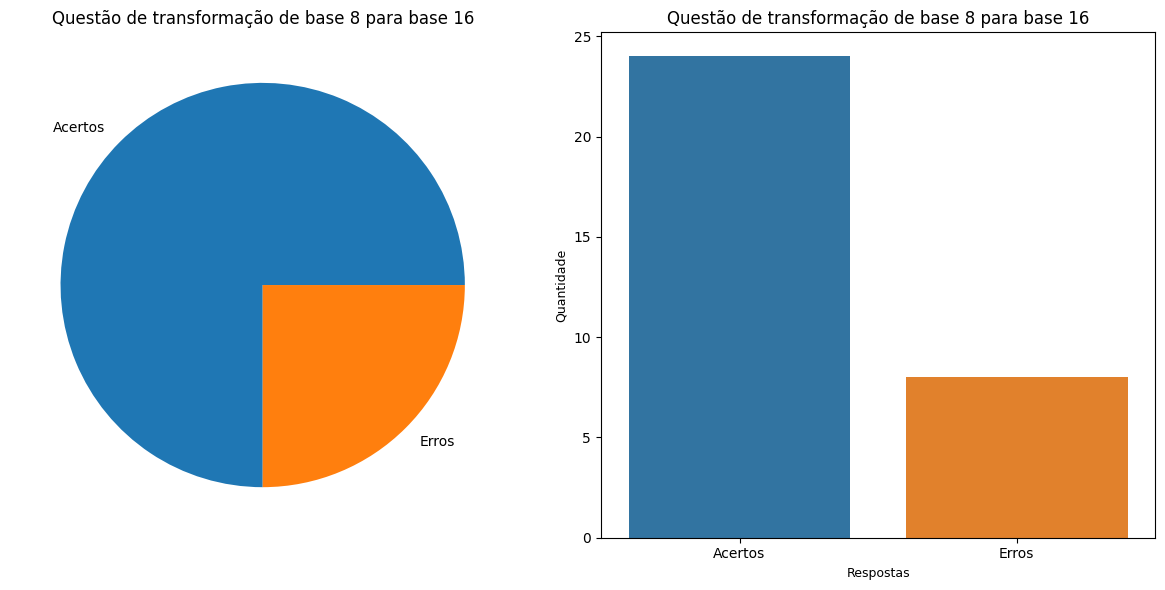

In [ ]:
plot_acertos_erros('Quest_2c')

Essa questão teve uma porcentagem "ok" de erros, totalizando aproximadamente 25%. É um conteúdo que talvez necessite de atenção,mas não com tanta urgência.

####Questão de transformação de base 16 para base 10:

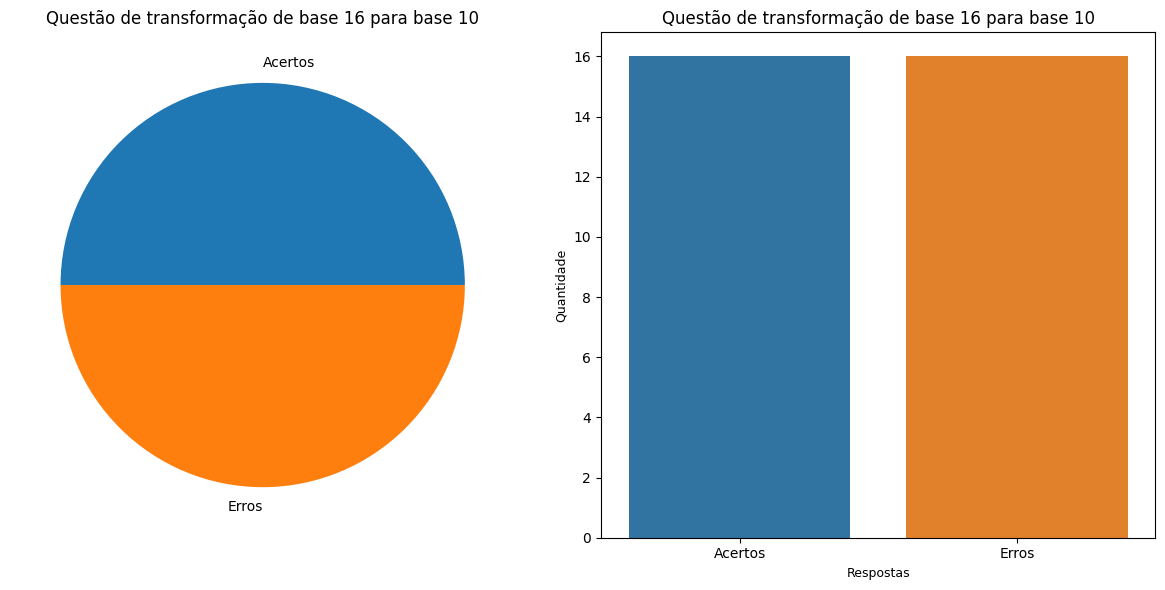

In [ ]:
plot_acertos_erros('Quest_2d')

Esse assunto talvez necessite ser mais exercitado. Metade dos alunos que fizeram a prova erraram a questão.

####Questão de cálculos aritméticos em binário:

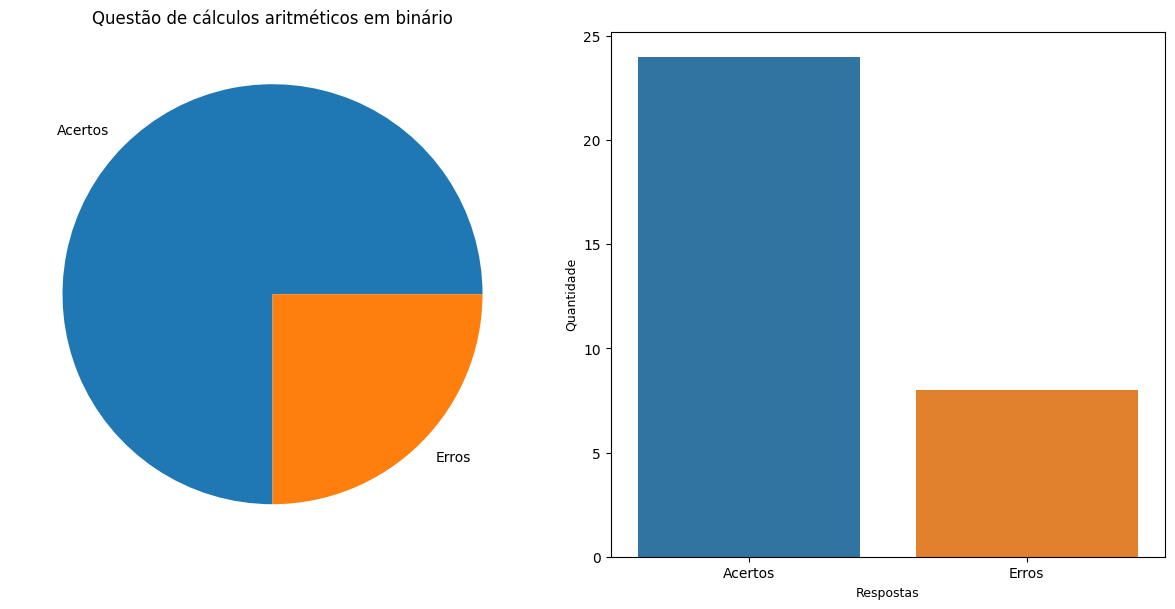

In [ ]:
plot_acertos_erros('Quest_3a')

Essa questão teve uma porcentagem "ok" de erros, totalizando aproximadamente 25%. É um conteúdo que talvez necessite de atenção,mas não com tanta urgência.

####Questão de transformação base 2 para base 10:

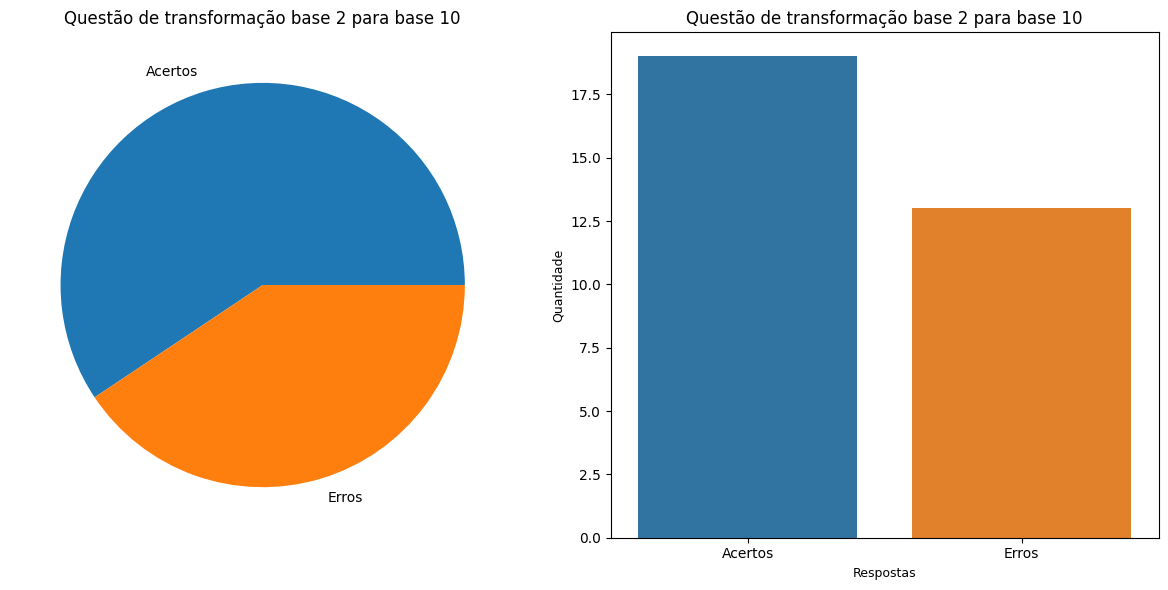

In [ ]:
plot_acertos_erros('Quest_3b')

Essa questão tiveram uma porcentagem considerável de erros. É um conteúdo que talvez necessite de atenção.

####Questão de escolha de base para representação e codificação de elementos/Questão de Tabela ASCII:

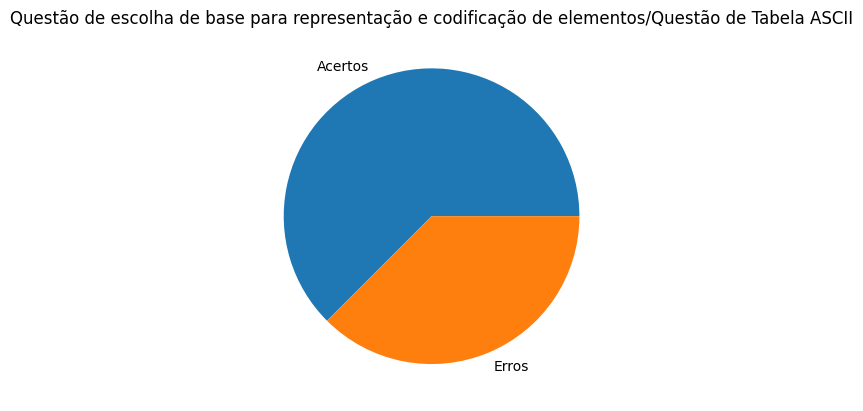

In [ ]:
status = ['Acertos', 'Erros']
df['Quest_4_5'] = df['Quest_4']+df['Quest_5']
erros = (df['Quest_4_5']==0).sum()
acertos = (df['Quest_4_5']==1).sum()
porcentagem_acertos = 100 * acertos / (erros + acertos)
porcentagem_erros = 100 * erros / (erros + acertos)
numero = [porcentagem_acertos, porcentagem_erros]

# Criando dois subplots, um para cada gráfico
fig, ax = plt.subplots()
# Gráfico de pizza (pie chart) na primeira posição do subplot
p1 = ax.pie(numero, labels=status, colors=[colors_map['Acertos'], colors_map['Erros']])
ax.set_title("Questão de escolha de base para representação e codificação de elementos/Questão de Tabela ASCII:")
plt.show()

Essas questões tiveram uma porcentagem considerável de erros. São conteúdos que talvez necessitem de atenção.

####Qual das questões foi mais escolhida-> Questão de escolha de base para representação e codificação de elementos ou Questão de Tabela ASCII:

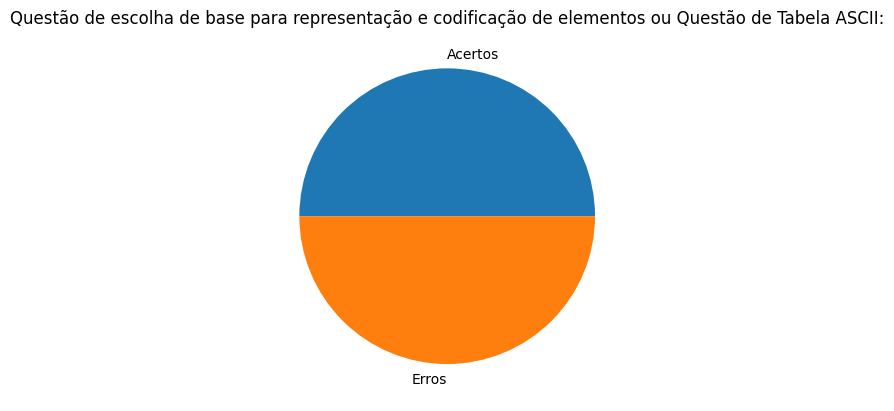

In [ ]:
status = ['Acertos', 'Erros']
df['Quest_4_5'] = df['Quest_4']+df['Quest_5']
quest_4 = (df['Quest_4']==1).sum()
quest_5 = (df['Quest_5']==1).sum()
total = (df['Quest_4_5']==1).sum()
porcentagem_quest_4 = 100 * quest_4 / total
porcentagem_quest_5 = 100 * quest_4 / total
numero = [porcentagem_quest_4, porcentagem_quest_5]

# Criando dois subplots, um para cada gráfico
fig, ax = plt.subplots()
# Gráfico de pizza (pie chart) na primeira posição do subplot
p1 = ax.pie(numero, labels=status, colors=[colors_map['Acertos'], colors_map['Erros']])
ax.set_title("Questão de escolha de base para representação e codificação de elementos ou Questão de Tabela ASCII:")
plt.show()

Observa-se que o número de escolhas das questões é o mesmo.

####Foi optado juntar a 4 e a 5 em uma única coluna, tendo em vista que os alunos podiam escolher qual das duas fazer.

In [ ]:
colunas_a_dropar = ['Quest_4', 'Quest_5']
df2 = df.drop(columns=colunas_a_dropar)
df2.head()

,Quest_1,Quest_2a,Quest_2b,Quest_2c,Quest_2d,Quest_3a,Quest_3b,Nota
0,1,1,0,1,0,1,0,7.50
1,0,1,1,0,0,1,1,4.00
2,1,1,1,1,1,1,1,8.00
3,1,1,1,1,1,1,1,10.00
4,0,0,1,0,0,1,0,3.75


####Heatmap das questões:

<Axes: ylabel='Nota'>

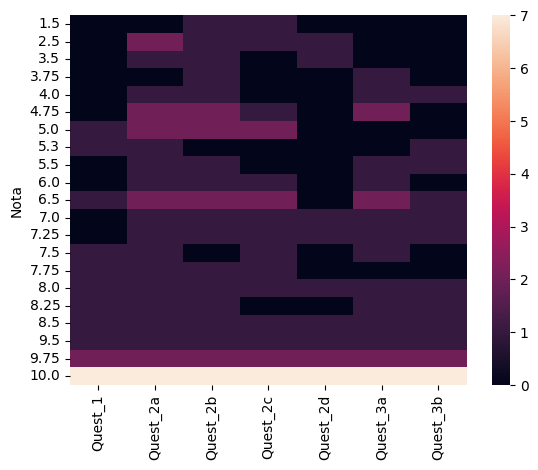

In [ ]:
df2 = df2.groupby('Nota').sum()
sns.heatmap(df2)

Ao observar o gráfico acima é perceptível que as pessoas que tiraram menor nota erraram mais a questão 1 (Questão de número de dígitos para representação de elementos com os sistemas de numeração),a questão 2d (Questão de transformação de base 16 para base 10) e a questão 4/5 (Questão de escolha de base para representação e codificação de elementos ou Questão de Tabela ASCII:). Assim, esses assuntos podem ser vistos com mais atenção, visando um melhor entendimento de todos os conteúdos ministrados na disciplina de Introdução ao Computador.

##Prova 2 (2022.2):

### Descrição dos dados das colunas do dataframe:
- Quest_1a: refere-se à questão de complemento de 2 para decimal.
- Quest_1b: refere-se à questão de  notação em excesso.
- Quest_1c: refere-se à questão de sinal magnitude.
- Quest_1d:refere-se à questão de complemento de 1.
- Quest_2a: refere-se à cálculo aritmético básico.
- Quest_2b: refere-se à transformação de binário para decimal.
- Quest_3: refere-se à transformação decimal para IEEE 754.
- Quest_4: refere-se à transformação de IEEE 754 para decimal.


###Abrindo o arquivo com informação de acertos e notas:

In [ ]:
df = pd.read_csv('https://github.com/Thiagorcj/Projeto2-IC/raw/main/Prova_2.csv')
df.head()

,Quest_1a,Quest_1b,Quest_1c,Quest_1d,Quest_2a,Quest_2b,Quest_3,Quest_4,Nota
0,1,0,0,1,1,1,1,1,9.00
1,1,0,1,1,1,0,0,0,6.00
2,1,1,1,1,1,1,1,1,10.00
3,0,1,0,0,1,0,0,0,2.50
4,0,1,0,1,0,0,0,0,1.75


###Média da turma:

In [ ]:
print(f"Média da turma: {df['Nota'].mean()}")

Média da turma: 6.2935483870967746


### Cálculo da porcentagem de acerto por questão:

In [ ]:
print("Porcentagem de acertos por questão:")
contador = 0
for coluna in df.columns:
    if contador < 7:
        acertos = (df[coluna]==1).sum()
        erros = (df[coluna]==0).sum()
        porcentagem = 100*acertos/(erros+acertos)
        contador +=1
        print(f"{quest_dict[coluna]} -> {porcentagem : .2f}%")

Porcentagem de acertos por questão:
Questão de complemento de 2 para decimal: ->  64.52%
Questão de notação em excesso: ->  61.29%
Questão de sinal magnitude: ->  58.06%
Questão de complemento de 1: ->  70.97%
Questão de cálculo aritmético básico: ->  67.74%
Questão de transformação de binário para decimal: ->  45.16%
Questãod de transformação decimal para IEEE 754: ->  61.29%


###Definindo novo dicionário:

In [ ]:
quest_dict = {
    'Quest_1a': 'Questão de complemento de 2 para decimal:',
    'Quest_1b': 'Questão de notação em excesso:',
    'Quest_1c': 'Questão de sinal magnitude:',
    'Quest_1d': 'Questão de complemento de 1:',
    'Quest_2a': 'Questão de cálculo aritmético básico:',
    'Quest_2b': 'Questão de transformação de binário para decimal:',
    'Quest_3': 'Questão de transformação decimal para IEEE 754:',
    'Quest_4': 'Questão de transformação de IEEE 754 para decimal:'
}

### Plotando gráficos e comentando o que pode ser observado:

####Questão de complemento de 2 para decimal:

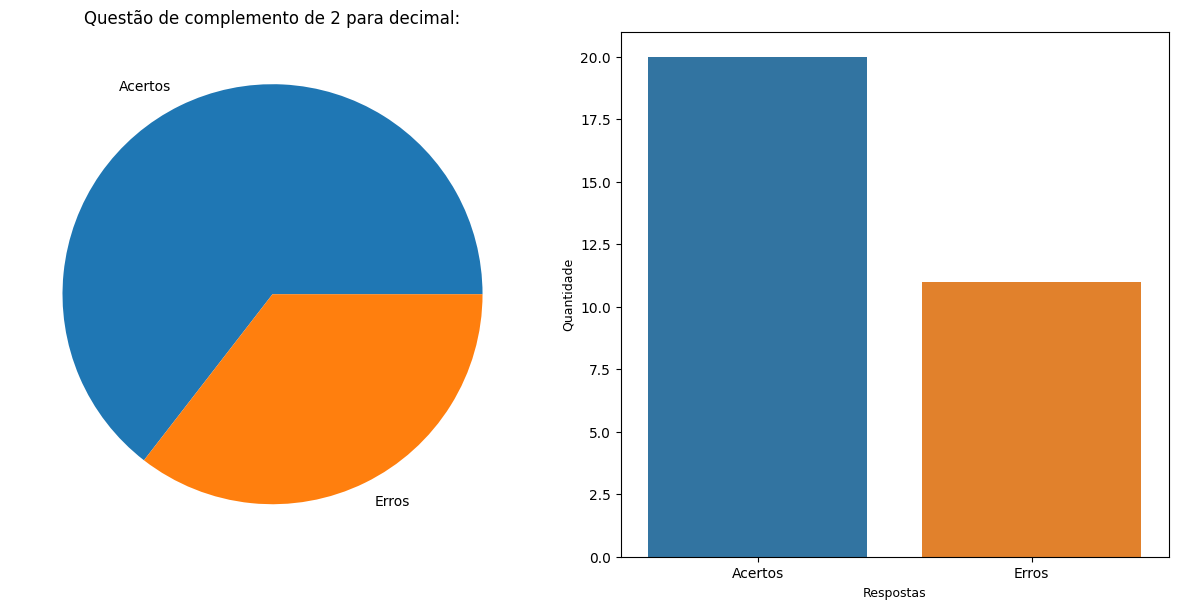

In [ ]:
plot_acertos_erros('Quest_1a')

####Questão de notação em excesso:

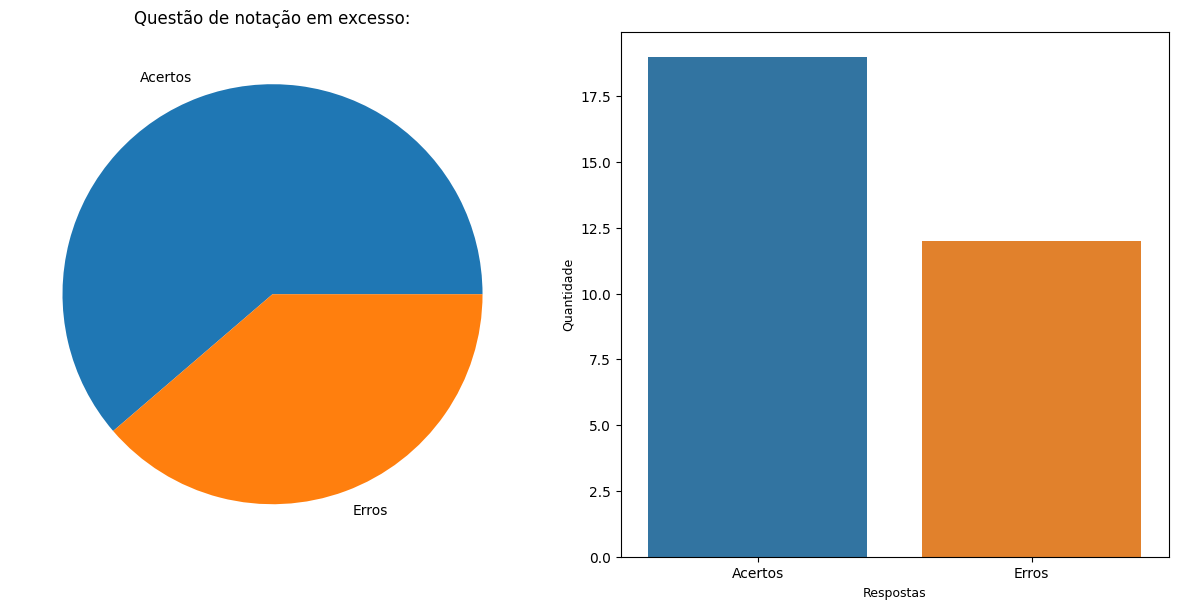

In [ ]:
plot_acertos_erros('Quest_1b')

####Questão de sinal magnitude:

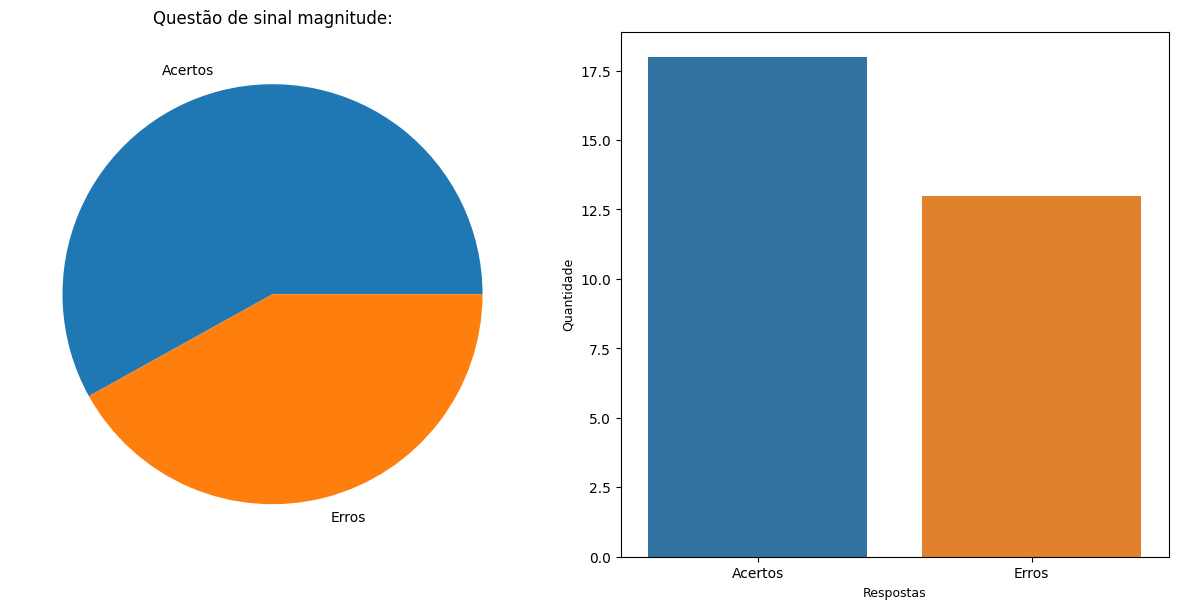

In [ ]:
plot_acertos_erros('Quest_1c')

####Questão de complemento de 1:

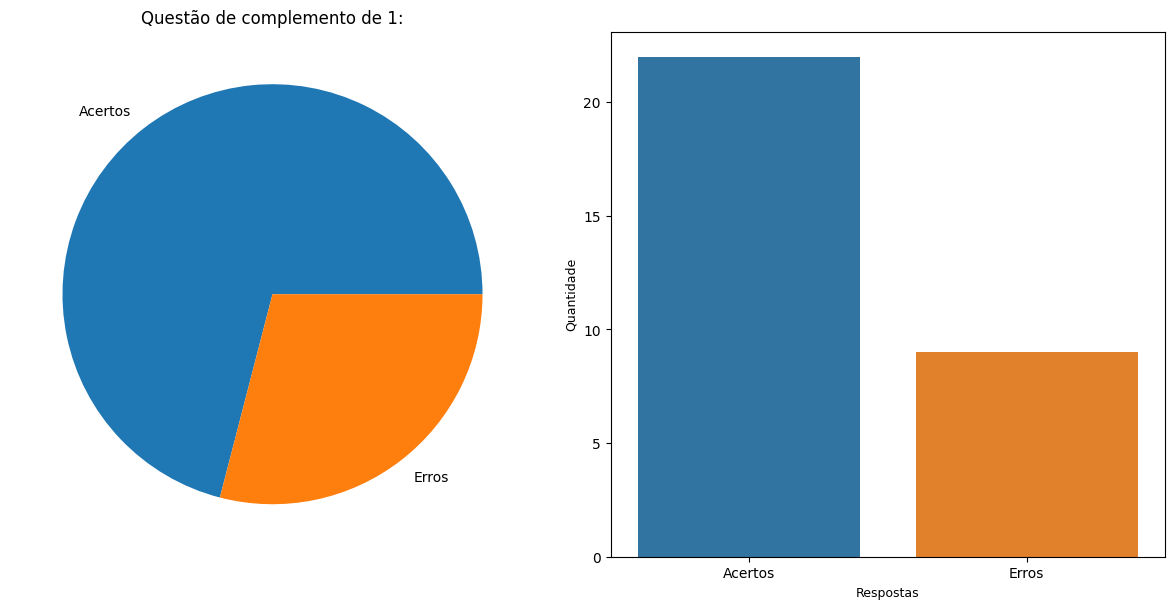

In [ ]:
plot_acertos_erros('Quest_1d')

####Questão de cálculo aritmético básico:

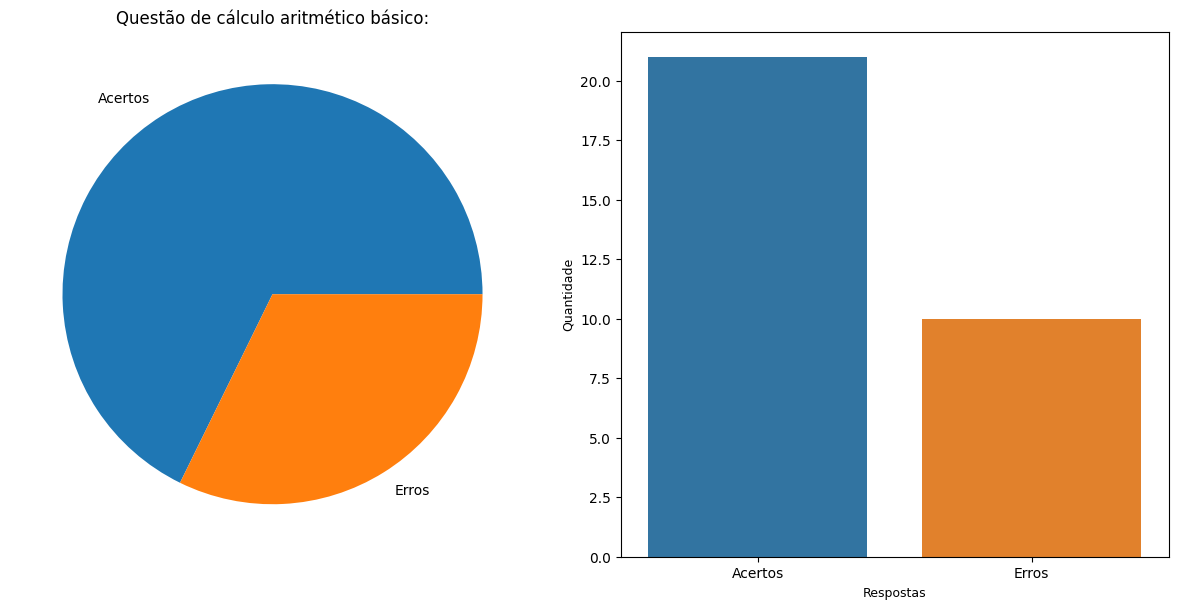

In [ ]:
plot_acertos_erros('Quest_2a')

####Questão de transformação de binário para decimal:

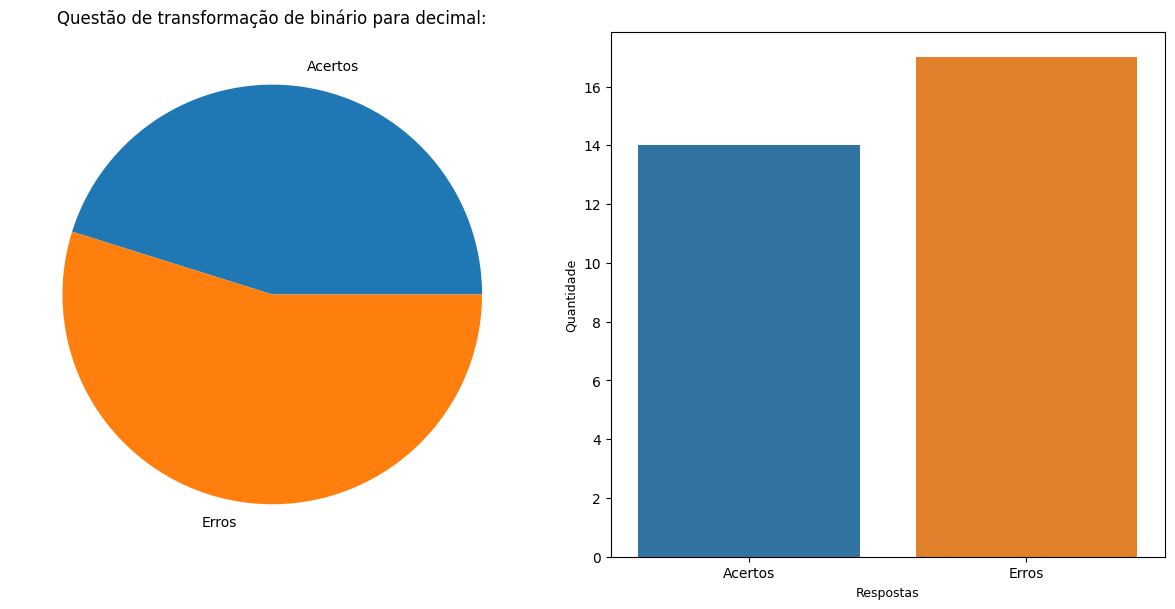

In [ ]:
plot_acertos_erros('Quest_2b')

É a questão com maior número de erros. É um conteúdo que também houve muitos erros na primeira prova. Uma das soluções para esse tipo de erro seria realizar mais exercícios. É uma uma conversão tão simples que acaba sendo "subestimada" pelos alunos.

####Questão de transformação decimal para IEEE 754:

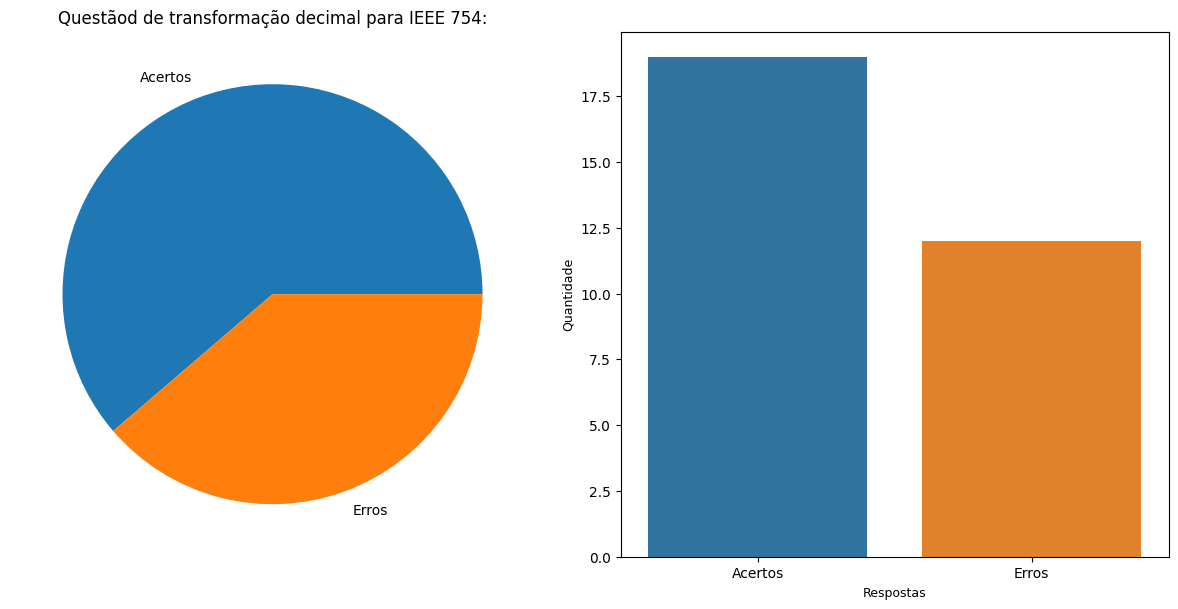

In [ ]:
plot_acertos_erros('Quest_3')

####Questão de transformação de IEEE 754 para decimal:

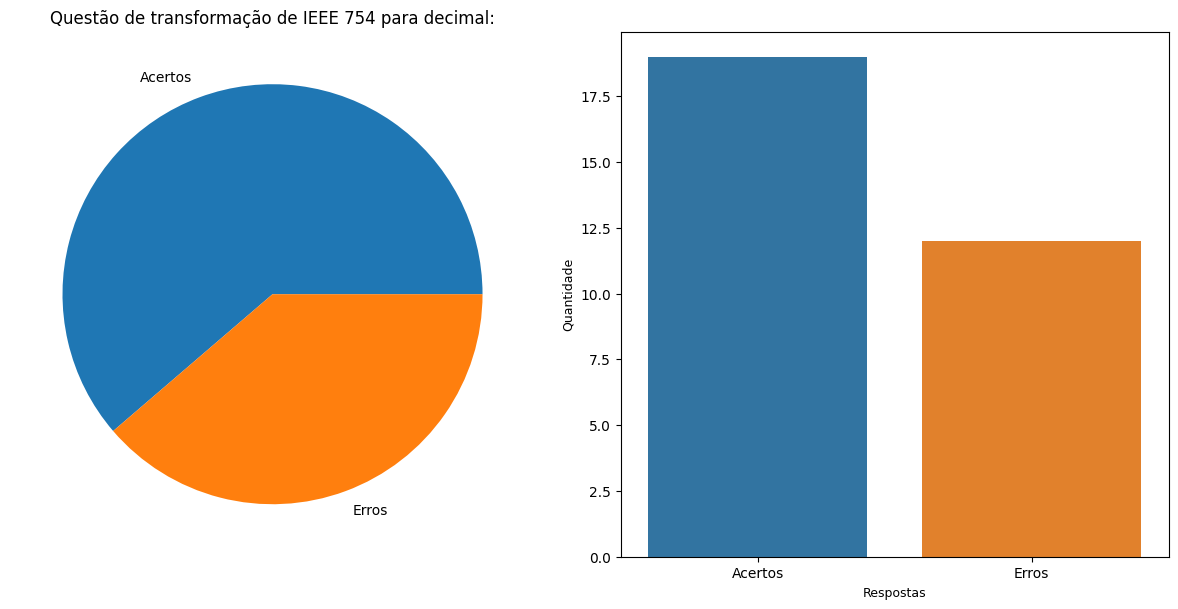

In [ ]:
plot_acertos_erros('Quest_4')

Há um número considerável de erros em todas as questões. Na segunda prova é percebido uma grande disparidade de notas e isso é percebido na constância de acertos e erros. Os acertos e erros se relacionam aos mesmos alunos. Ou tiraram notas altas ou muito baixas. Isso pode ser entendido como uma provável desmotivação ou desintesse de parcela considerável dos alunos. Dessa forma, o que pode ser feito é tentar desenvolver novas atividades que motivem e animem os alunos a permanecer empenhados na disciplina.

#### Heatmap:

<Axes: ylabel='Nota'>

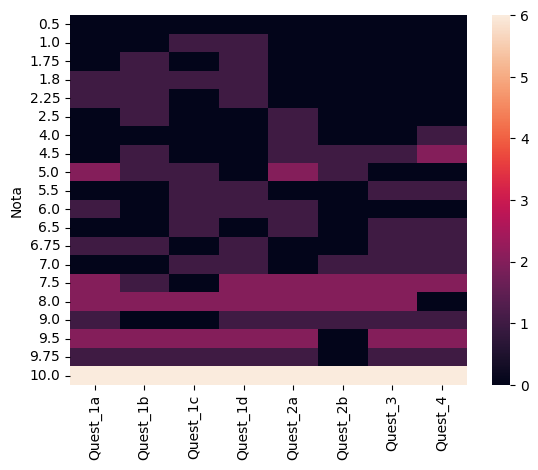

In [ ]:
df = df.groupby('Nota').sum()
sns.heatmap(df)

Pelo gráfico acima pode ser observado que os erros estão distribuidos de forma não uniforme o que dificulta a análise. Foi escolhido ver com mais atenção as pessoas no meio das notas, as quais seriam as pessoas que demonstraram interesse em fazer a prova, mas não obtiveram notas máximas: Nesses casos percebe-se que as questões 1a (Questão de complemento de 2 para decimal), 1b (Questão de notação em excesso) e 2b (Questão de transformação de binário para decimal) foram as questões mais erradas por esses alunos.Nesse sentido, tais conteúdo podem ser observados com maior atenção.